In [1]:
import numpy as np
import pandas as pd
import scipy.linalg

(a) Read the dataset in file1.csv into a pandas dataframe.

In [2]:
df=pd.read_csv("file1.csv")
df.head()

attr1  attr2  attr3  attr4  attr5  attr6  attr7   atr8  attr9  attr10  \
0   42.9   26.0   31.5   13.1   10.4   18.8   14.1  106.2   71.5    32.5   
1   43.7   28.5   33.5   14.0   11.8   20.6   15.1  110.5   79.0    34.4   
2   40.1   28.2   33.3   13.9   10.9   19.7   14.1  115.1   83.2    33.4   
3   44.3   29.9   34.0   13.9   11.2   20.9   15.0  104.5   77.8    31.0   
4   41.0   26.8   32.2   14.9   10.6   17.8   14.0  107.5   78.0    36.0   

   attr11  attr12  attr13  attr14  attr15  attr16  attr17  attr18  
0    26.0    34.5    36.5    23.5    16.5      21       1    65.6  
1    28.0    36.5    37.5    24.5    17.0      23       1    71.8  
2    28.8    37.0    37.3    21.9    16.9      28       1    80.7  
3    26.2    37.0    34.8    23.0    16.6      23       1    72.6  
4    29.0    34.5    35.0    22.0    16.5      23       1    71.0

(b) Replace the column names of data frame with meaningful column names, designed by you using
the description in desc1.txt.

In [3]:
with open('desc1.txt.txt') as f:
    [print(line) for line in f.readlines()]

Body measurements of 446 physically active individuals.



Description

Body girth measurements and skeletal diameter measurements, as well as age, weight and gender, are given for 446 physically active individuals - 223 men and 223 women. 



Format

A data frame with 446 observations on the following 18 variables.



attr1

A numerical vector, respondent's biacromial diameter in centimeters.



attr2

A numerical vector, respondent's biiliac diameter (pelvic breadth) in centimeters.



attr3

A numerical vector, respondent's bitrochanteric diameter in centimeters.



attr4

A numerical vector, respondent's elbow diameter in centimeters, measured as sum of two elbows.



attr5

A numerical vector, respondent's wrist diameter in centimeters, measured as sum of two wrists.



attr6

A numerical vector, respondent's knee diameter in centimeters, measured as sum of two knees.



attr7

A numerical vector, respondent's ankle diameter in centimeters, measured as sum of two ankles.



attr8


In [4]:
df.columns=['biacromial diameter','biiliac diameter','bitrochanteric diameter','elbow diameter','wrist diameter','knee diameter','ankle diameter','shoulder girth','waist girth','bicep girth','forearm girth','knee girth','calf maximum girth','ankle minimum girth','wrist minimum girth','age','gender','weight']

In [5]:
df.head()

biacromial diameter  biiliac diameter  bitrochanteric diameter  \
0                 42.9              26.0                     31.5   
1                 43.7              28.5                     33.5   
2                 40.1              28.2                     33.3   
3                 44.3              29.9                     34.0   
4                 41.0              26.8                     32.2   

   elbow diameter  wrist diameter  knee diameter  ankle diameter  \
0            13.1            10.4           18.8            14.1   
1            14.0            11.8           20.6            15.1   
2            13.9            10.9           19.7            14.1   
3            13.9            11.2           20.9            15.0   
4            14.9            10.6           17.8            14.0   

   shoulder girth  waist girth  bicep girth  forearm girth  knee girth  \
0           106.2         71.5         32.5           26.0        34.5   
1           110.5         79.0         34.4           28.0        36.5   
2           115.1         83.2         33.4           28.8        37.0   
3           104.5         77.8         31.0           26.2        37.0   
4           107.5         78.0         36.0           29.0        34.5   

   calf maximum girth  ankle minimum girth  wrist minimum girth  age  gender  \
0                36.5                 23.5                 16.5   21       1   
1                37.5                 24.5                 17.0   23       1   
2                37.3                 21.9                 16.9   28       1   
3                34.8                 23.0                 16.6   23       1   
4                35.0                 22.0                 16.5   23       1   

   weight  
0    65.6  
1    71.8  
2    80.7  
3    72.6  
4    71.0

In [6]:
dis=df.describe().iloc[3:,:]
dis.index=['minimum','first quartile','median','third quartile','maximum']
dis

biacromial diameter  biiliac diameter  \
minimum                      32.600             18.70   
first quartile               36.200             26.50   
median                       38.700             27.85   
third quartile               41.175             29.20   
maximum                      46.200             34.70   

                bitrochanteric diameter  elbow diameter  wrist diameter  \
minimum                            26.3             9.9             8.1   
first quartile                     30.6            12.4             9.8   
median                             32.0            13.2            10.5   
third quartile                     33.3            14.4            11.2   
maximum                            37.8            16.7            13.3   

                knee diameter  ankle diameter  shoulder girth  waist girth  \
minimum                  15.7             9.9          85.900        57.90   
first quartile           17.9            12.9          99.325        68.00   
median                   18.7            13.8         108.300        75.55   
third quartile           19.6            14.8         116.675        84.65   
maximum                  24.3            17.2         134.800       113.20   

                bicep girth  forearm girth  knee girth  calf maximum girth  \
minimum               22.40         19.600      29.000                28.4   
first quartile        27.40         23.400      34.400                34.0   
median                30.85         25.800      36.000                35.9   
third quartile        34.40         28.375      37.775                37.9   
maximum               42.30         32.500      49.000                47.7   

                ankle minimum girth  wrist minimum girth   age  gender  \
minimum                      16.400                 13.0  18.0     0.0   
first quartile               20.925                 15.0  23.0     0.0   
median                       22.000                 16.1  28.0     0.5   
third quartile               23.275                 17.1  36.0     1.0   
maximum                      29.300                 19.6  65.0     1.0   

                 weight  
minimum          42.000  
first quartile   58.325  
median           67.950  
third quartile   78.750  
maximum         116.400

(c) Use an appropriate pandas command to check if any column in the dataframe contains any
missing value or not. Drop those rows if there are missing values in the row.


In [7]:
for i in df.columns:
  print("number of misssing value is",df[i].isna().sum(),"number of unique value is ",df[i].nunique(),'in columns',i)

number of misssing value is 0 number of unique value is  111 in columns biacromial diameter
number of misssing value is 0 number of unique value is  87 in columns biiliac diameter
number of misssing value is 0 number of unique value is  86 in columns bitrochanteric diameter
number of misssing value is 0 number of unique value is  62 in columns elbow diameter
number of misssing value is 0 number of unique value is  47 in columns wrist diameter
number of misssing value is 0 number of unique value is  64 in columns knee diameter
number of misssing value is 0 number of unique value is  58 in columns ankle diameter
number of misssing value is 0 number of unique value is  260 in columns shoulder girth
number of misssing value is 0 number of unique value is  256 in columns waist girth
number of misssing value is 0 number of unique value is  154 in columns bicep girth
number of misssing value is 0 number of unique value is  111 in columns forearm girth
number of misssing value is 0 number of u

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   biacromial diameter      446 non-null    float64
 1   biiliac diameter         446 non-null    float64
 2   bitrochanteric diameter  446 non-null    float64
 3   elbow diameter           446 non-null    float64
 4   wrist diameter           446 non-null    float64
 5   knee diameter            446 non-null    float64
 6   ankle diameter           446 non-null    float64
 7   shoulder girth           446 non-null    float64
 8   waist girth              446 non-null    float64
 9   bicep girth              446 non-null    float64
 10  forearm girth            446 non-null    float64
 11  knee girth               446 non-null    float64
 12  calf maximum girth       446 non-null    float64
 13  ankle minimum girth      446 non-null    float64
 14  wrist minimum girth      4

(d) [3 marks] Perform standardization of each column in the data frame and create a new data
frame.


In [9]:
new_df=pd.DataFrame({})
for i in df.columns:
  new_df[i]=(df[i]-df[i].mean())/df[i].std()

(e) [1 mark] Display the maximum, minimum, median, first quartile, third quartile information for
each column in the dataframe. Use an appropriate pandas command.

In [10]:
new_df.describe()

biacromial diameter  biiliac diameter  bitrochanteric diameter  \
count         4.460000e+02      4.460000e+02             4.460000e+02   
mean         -5.098064e-16      1.449762e-15            -1.354173e-15   
std           1.000000e+00      1.000000e+00             1.000000e+00   
min          -2.039210e+00     -4.120658e+00            -2.819269e+00   
25%          -8.597166e-01     -5.775786e-01            -6.716704e-01   
50%          -4.062405e-02      3.564671e-02             2.754767e-02   
75%           7.702775e-01      6.488720e-01             6.768216e-01   
max           2.416653e+00      3.147197e+00             2.924308e+00   

       elbow diameter  wrist diameter  knee diameter  ankle diameter  \
count    4.460000e+02    4.460000e+02   4.460000e+02    4.460000e+02   
mean     1.274516e-15    5.735323e-16   4.779435e-16    2.549032e-16   
std      1.000000e+00    1.000000e+00   1.000000e+00    1.000000e+00   
min     -2.540391e+00   -2.539425e+00  -2.271900e+00   -3.127188e+00   
25%     -7.010820e-01   -7.663410e-01  -6.452303e-01   -7.403211e-01   
50%     -1.125030e-01   -3.624744e-02  -5.371393e-02   -2.426113e-02   
75%      7.703654e-01    6.938461e-01   6.117420e-01    7.713611e-01   
max      2.462530e+00    2.884127e+00   4.086901e+00    2.680854e+00   

       shoulder girth   waist girth   bicep girth  forearm girth  \
count    4.460000e+02  4.460000e+02  4.460000e+02   4.460000e+02   
mean     8.284355e-16 -6.372581e-16 -5.098064e-16   1.656871e-15   
std      1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
min     -2.122177e+00 -1.707663e+00 -2.033722e+00  -2.220586e+00   
25%     -8.438042e-01 -8.088994e-01 -8.570622e-01  -8.808034e-01   
50%      1.082471e-02 -1.370512e-01 -4.516686e-02  -3.462501e-02   
75%      8.083196e-01  6.727261e-01  7.902617e-01   8.732539e-01   
max      2.534241e+00  3.213291e+00  2.649384e+00   2.327623e+00   

         knee girth  calf maximum girth  ankle minimum girth  \
count  4.460000e+02        4.460000e+02         4.460000e+02   
mean   8.921613e-16        2.357855e-15         1.688734e-15   
std    1.000000e+00        1.000000e+00         1.000000e+00   
min   -2.720701e+00       -2.638745e+00        -3.024751e+00   
25%   -6.691869e-01       -7.032004e-01        -6.366744e-01   
50%   -6.133077e-02       -4.649772e-02        -6.934136e-02   
75%    6.130096e-01        6.447683e-01         6.035420e-01   
max    4.877500e+00        4.031972e+00         3.783246e+00   

       wrist minimum girth         age        gender        weight  
count         4.460000e+02  446.000000  4.460000e+02  4.460000e+02  
mean         -5.098064e-16    0.000000  1.274516e-16 -4.460806e-16  
std           1.000000e+00    1.000000  1.000000e+00  1.000000e+00  
min          -2.210646e+00   -1.279602 -9.988783e-01 -2.004288e+00  
25%          -7.837002e-01   -0.761158 -9.988783e-01 -7.927079e-01  
50%           1.119800e-03   -0.242715  0.000000e+00 -7.837636e-02  
75%           7.145925e-01    0.586794  9.988783e-01  7.231592e-01  
max           2.498274e+00    3.593765  9.988783e-01  3.517401e+00

(f) Consider the weight attribute as the response variable and all other attributes as predictor variables.


(g) Split the data into two sets such that 80% of the data is considered as set T1 and 20% of the
data is considered as set T2.

In [11]:
t_1=new_df.sample(frac=0.8,random_state=99)
t_2=new_df.drop(t_1.index)

(h) [5 marks] To perform ℓ2 regularized least squares regression, choose regularization constant
λ ∈ {10−5
, 10−4
, 10−3
, 10−2
, 10−1
, 1, 10, 100, 1000, 10000} using a 5-fold cross-validation on the
full train set T1. Use average R2
scores of the folds as the criterion to choose best regularization
parameter λ
⋆
. Perform ℓ2 regularized least squares regression with best regularization parameter λ
⋆ obtained from the cross-validation procedure on the set T1 and obtain the regression
coefficients. From the regression coefficients obtained, indicate the relative importance of each
attribute in predicting the response variable using the magnitude and sign of the regression coefficients. Compare the regression coefficients with those obtained in Question 1, discuss your
observations

In [12]:
def r_2_mse_ssr(x,y,beta):
  assert len(y)==len(x)
  y_bar=0
  for i in range(len(y)):
    y_bar+=y[i]
  y_bar/=len(y)
  eyy=0
  for i in range(len(y)):
    eyy+=(y[i]-y_bar)**2
  residual=[]
  ssr=0
  for i in range(len(y)):
    y_pred=np.dot(beta,x[i])
    residual.append(y[i]-y_pred)
    ssr+=(y[i]-y_pred)**2
  mse=ssr/len(y)
  r_2=1-(ssr/eyy)
  return r_2,mse,ssr

In [13]:
def beta_generate(x,y,lembda):
  xty=np.matmul(x.T,y)
  xtx=np.matmul(x.T,x)
  i=np.identity(xtx.shape[0])
  if np.linalg.det(xtx+lembda*i) ==0:
    beta=scipy.linalg.solve(xtx+lembda*i,xty)
  else:
    beta=np.matmul(np.linalg.inv(xtx+lembda*i),xty)
  return beta

In [14]:
lembda=[0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000]

In [15]:
t_3=t_1.sample(frac=1,random_state=200)
r_square_mean_train=[]
ssr_mean_train=[]
r_square_mean_test=[]
ssr_mean_test=[]
mse_mean_train=[]
mse_mean_test=[]
for j in range(5):
  test=t_3.iloc[int(j*(len(t_1)/5)):int((j+1)*(len(t_1)/5)),:]
  train=t_3.drop(test.index)
  x_train=train.iloc[:,:-1].to_numpy()
  x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1), dtype=x_train.dtype)))
  x_test=test.iloc[:,:-1].to_numpy()
  x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1), dtype=x_test.dtype)))
  y_train=train.iloc[:,-1].to_numpy()
  y_test=test.iloc[:,-1].to_numpy()
  r_square_train=[]
  ssr_train=[]
  r_square_test=[]
  ssr_test=[]
  mse_train=[]
  mse_test=[]
  for i in lembda:
    beta=beta_generate(x_train,y_train,i)
    a,b,c=r_2_mse_ssr(x_train,y_train,beta)
    d,e,f=r_2_mse_ssr(x_test,y_test,beta)
    r_square_train.append(a)
    r_square_test.append(d)
    ssr_train.append(c)
    ssr_test.append(f)
    mse_train.append(b)
    mse_test.append(e)
  r_square_mean_train.append(r_square_train)
  ssr_mean_train.append(ssr_train)
  mse_mean_train.append(mse_train)
  r_square_mean_test.append(r_square_test)
  ssr_mean_test.append(ssr_test)
  mse_mean_test.append(mse_test)
r_square_train=np.mean(r_square_mean_train,axis=0)
r_square_test=np.mean(r_square_mean_test,axis=0)
mse_train=np.mean(mse_mean_train,axis=0)
mse_test=np.mean(mse_mean_test,axis=0)
ssr_train=np.mean(ssr_mean_train,axis=0)
ssr_test=np.mean(ssr_mean_test,axis=0)

In [16]:
result=pd.DataFrame({'lembda':lembda,'R^2 train':r_square_train,"R^2 test":r_square_test,'ssr train':ssr_train,'ssr test':ssr_test,"mse train":mse_train,"mse test":mse_test})
result

lembda  R^2 train  R^2 test   ssr train   ssr test  mse train  \
0       0.00000   0.952966  0.945384   13.311852   3.792377   0.046612   
1       0.00001   0.952966  0.945384   13.311852   3.792377   0.046612   
2       0.00010   0.952966  0.945384   13.311852   3.792376   0.046612   
3       0.00100   0.952966  0.945384   13.311852   3.792368   0.046612   
4       0.01000   0.952966  0.945385   13.311852   3.792289   0.046612   
5       0.10000   0.952966  0.945396   13.311888   3.791512   0.046612   
6       1.00000   0.952954  0.945488   13.315284   3.784835   0.046624   
7      10.00000   0.952141  0.945410   13.545237   3.788726   0.047429   
8     100.00000   0.936066  0.931276   18.095419   4.789267   0.063361   
9    1000.00000   0.844563  0.841736   44.009499  11.176857   0.154097   
10  10000.00000   0.371691  0.369042  177.984968  44.605744   0.623207   

    mse test  
0   0.053140  
1   0.053140  
2   0.053140  
3   0.053140  
4   0.053139  
5   0.053128  
6   0.053035  
7   0.053089  
8   0.067113  
9   0.156616  
10  0.624984

In [17]:
import matplotlib.pyplot as plt
plt.plot(lembda,r_square_train,label="training set",color='b')
plt.plot(lembda,r_square_test,label="test set",color='r')
plt.xlabel("lembda")
plt.ylabel('r_square')
plt.show()

In [18]:
seeds=[199,299,399,499,599]
r_square_mean_train=[]
ssr_mean_train=[]
r_square_mean_test=[]
ssr_mean_test=[]
mse_mean_train=[]
mse_mean_test=[]
for j in seeds:
  train=t_1.sample(frac=0.8,random_state=j)
  test=t_1.drop(train.index)
  x_train=train.iloc[:,:-1].to_numpy()
  x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1), dtype=x_train.dtype)))
  x_test=test.iloc[:,:-1].to_numpy()
  x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1), dtype=x_test.dtype)))
  y_train=train.iloc[:,-1].to_numpy()
  y_test=test.iloc[:,-1].to_numpy()
  r_square_train=[]
  ssr_train=[]
  r_square_test=[]
  ssr_test=[]
  mse_train=[]
  mse_test=[]
  for i in lembda:
    beta=beta_generate(x_train,y_train,i)
    a,b,c=r_2_mse_ssr(x_train,y_train,beta)
    d,e,f=r_2_mse_ssr(x_test,y_test,beta)
    r_square_train.append(a)
    r_square_test.append(d)
    ssr_train.append(c)
    ssr_test.append(f)
    mse_train.append(b)
    mse_test.append(e)
  r_square_mean_train.append(r_square_train)
  ssr_mean_train.append(ssr_train)
  mse_mean_train.append(mse_train)
  r_square_mean_test.append(r_square_test)
  ssr_mean_test.append(ssr_test)
  mse_mean_test.append(mse_test)
r_square_train=np.mean(r_square_mean_train,axis=0)
r_square_test=np.mean(r_square_mean_test,axis=0)
mse_train=np.mean(mse_mean_train,axis=0)
mse_test=np.mean(mse_mean_test,axis=0)
ssr_train=np.mean(ssr_mean_train,axis=0)
ssr_test=np.mean(ssr_mean_test,axis=0)

In [19]:
import matplotlib.pyplot as plt
plt.plot(lembda,r_square_train,label="training set",color='b')
plt.plot(lembda,r_square_test,label="test set",color='r')
plt.xlabel("lembda")
plt.ylabel('r_square')
plt.show()

In [20]:
result=pd.DataFrame({'lembda':lembda,'R^2 train':r_square_train,"R^2 test":r_square_test,'ssr train':ssr_train,'ssr test':ssr_test,"mse train":mse_train,"mse test":mse_test})
result

lembda  R^2 train  R^2 test   ssr train   ssr test  mse train  \
0       0.00000   0.951080  0.950946   13.540297   3.529255   0.047344   
1       0.00001   0.951080  0.950946   13.540297   3.529255   0.047344   
2       0.00010   0.951080  0.950946   13.540297   3.529254   0.047344   
3       0.00100   0.951080  0.950946   13.540297   3.529245   0.047344   
4       0.01000   0.951080  0.950947   13.540297   3.529155   0.047344   
5       0.10000   0.951080  0.950960   13.540333   3.528274   0.047344   
6       1.00000   0.951067  0.951072   13.543768   3.520679   0.047356   
7      10.00000   0.950228  0.951157   13.775946   3.522778   0.048168   
8     100.00000   0.933762  0.938075   18.342466   4.557639   0.064134   
9    1000.00000   0.839473  0.850023   44.497094  11.375159   0.155584   
10  10000.00000   0.363859  0.365352  176.582939  48.046514   0.617423   

    mse test  
0   0.049708  
1   0.049708  
2   0.049708  
3   0.049708  
4   0.049706  
5   0.049694  
6   0.049587  
7   0.049617  
8   0.064192  
9   0.160214  
10  0.676711

In [21]:
def r_2_mse_ssr_residual(x,y,beta):
  assert len(y)==len(x)
  y_bar=0
  for i in range(len(y)):
    y_bar+=y[i]
  y_bar/=len(y)
  eyy=0
  for i in range(len(y)):
    eyy+=(y[i]-y_bar)**2
  residual=[]
  ssr=0
  for i in range(len(y)):
    y_pred=np.dot(beta,x[i])
    residual.append(y[i]-y_pred)
    ssr+=(y[i]-y_pred)**2
  mse=ssr/len(y)
  r_2=1-(ssr/eyy)
  return r_2,mse,ssr,residual

In [22]:
x_train=t_1.iloc[:,:-1].to_numpy()
x_test=t_2.iloc[:,:-1].to_numpy()
y_train=t_1.iloc[:,-1].to_numpy()
y_test=t_2.iloc[:,-1].to_numpy()
x_train=np.hstack((x_train,np.ones((x_train.shape[0],1),dtype=x_train.dtype)))
x_test=np.hstack((x_test,np.ones((x_test.shape[0],1),dtype=x_test.dtype)))
beta=beta_generate(x_train,y_train,10)
a,b,c,d=r_2_mse_ssr_residual(x_train,y_train,beta)
e,f,g,h=r_2_mse_ssr_residual(x_test,y_test,beta)
print('R^2 for training set is ',a)
print('mean square error for training set is',b)
print('sum of square residual for training set is',c)
print('R^2 for test set is ',a)
print('mean square error for test set is',b)
print('sum of square residual for test set is',c)

R^2 for training set is  0.9518538676742467
mean square error for training set is 0.04777643068595107
sum of square residual for training set is 17.05618575488453
R^2 for test set is  0.9518538676742467
mean square error for test set is 0.04777643068595107
sum of square residual for test set is 17.05618575488453


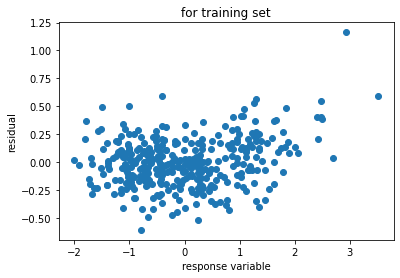

In [23]:
plt.scatter(y_train,d)
plt.title("for training set")
plt.xlabel("response variable")
plt.ylabel('residual')
plt.show()

In [24]:
plt.scatter(y_test,h)
plt.title("for test set")
plt.xlabel("response variable")
plt.ylabel('residual')
plt.show()

In [25]:
beta=beta_generate(x_train,y_train,10)
print(beta)

[ 0.01296733  0.0619947   0.07229422  0.04832398  0.01885752  0.01761946
  0.03690144  0.17154091  0.3900161   0.09789193  0.07032009  0.12252294
  0.08286321  0.01746271 -0.00080913 -0.07030632 -0.0758091   0.0010675 ]


In [26]:
pd.DataFrame({'columns name':['biacromial diameter','biiliac diameter','bitrochanteric diameter','elbow diameter','wrist diameter','knee diameter','ankle diameter','shoulder girth','waist girth','bicep girth','forearm girth','knee girth','calf maximum girth','ankle minimum girth','wrist minimum girth','age','gender','scale parameter'],'beta absolute value standarization':np.absolute(beta),'beta value standarization':beta,'beta value without stadarization':[ 5.56865910e-02,  3.40303467e-01,  4.57080078e-01,  5.89531676e-01,
        2.31426929e-01,  1.38204323e-01,  4.59463844e-01,  2.20900368e-01,
        5.24946915e-01,  2.64342508e-01,  3.69081177e-01,  6.04093411e-01,
        3.75945814e-01,  6.38184438e-02, -7.60047088e-02, -1.14277101e-01,
       -2.63861945e+00, -8.93846810e+01]}).sort_values(by='beta absolute value standarization',ascending=False)

columns name  beta absolute value standarization  \
8               waist girth                            0.390016   
7            shoulder girth                            0.171541   
11               knee girth                            0.122523   
9               bicep girth                            0.097892   
12       calf maximum girth                            0.082863   
16                   gender                            0.075809   
2   bitrochanteric diameter                            0.072294   
10            forearm girth                            0.070320   
15                      age                            0.070306   
1          biiliac diameter                            0.061995   
3            elbow diameter                            0.048324   
6            ankle diameter                            0.036901   
4            wrist diameter                            0.018858   
5             knee diameter                            0.017619   
13      ankle minimum girth                            0.017463   
0       biacromial diameter                            0.012967   
17          scale parameter                            0.001067   
14      wrist minimum girth                            0.000809   

    beta value standarization  beta value without stadarization  
8                    0.390016                          0.524947  
7                    0.171541                          0.220900  
11                   0.122523                          0.604093  
9                    0.097892                          0.264343  
12                   0.082863                          0.375946  
16                  -0.075809                         -2.638619  
2                    0.072294                          0.457080  
10                   0.070320                          0.369081  
15                  -0.070306                         -0.114277  
1                    0.061995                          0.340303  
3                    0.048324                          0.589532  
6                    0.036901                          0.459464  
4                    0.018858                          0.231427  
5                    0.017619                          0.138204  
13                   0.017463                          0.063818  
0                    0.012967                          0.055687  
17                   0.001067                        -89.384681  
14                  -0.000809                         -0.076005

 as we know  important atribute are those who have higher magnitude of regression coefficient

 here for standarized data waist girth has larger regression coefficient so for our model it is important after that shoulder girth is important and so on

 if a regression coefficient is negative that means they are negative corelated with response variable i.e. if we increase coresponding attribute value response variable decrease 

 if a regression coefficient is positive that means they are posivite corelated with response variable i.e. if we increase coresponding attribute value respose variable increase

 magnitude of regression coefficient is related to relative change in response variable i.e. magnitude is high means it has higher impact on response variable similarly magnitude of response variable is correspond to their impact on response variable

 in our model 3 regression coefficient is negative 15 are positive 

 some of them are less important since it regression coefficient is small like wrist minimum girth biacromial diameter and so on. since it's regression coefficient is less so it does not contribute much more on regression model 

 but for non standarized data scene is slightly different here coefficient is large (due to stndarization) also we got larger weightage on some of attribute that is in general not possible like for non standarized data gender weightage is large and negative that is not case in general gender does not contribute more on weight of boddy similarly for some more attribute 

 in standarized model higher weightage on waist girth that is in  general right attribute for predicting weight 

 highest weightage for non standarized data is knee girth but is not so natural 

 in non standarized model regression coefficient of 4 attribute is negative(including intercept) but in standarized model 3 attribute is negative (including intercept)

from above discussion we can say that in both model non  standarized and standarized both have same R^2 value and MSE but non standarized model is slightly misleading in term of regression coefficient 

so standarization gives more accuracy on unseen data set 


(i) [3 marks] Rank the attributes in the data set (excluding the bias term) based on non-increasing
order of magnitude of the regression coefficients and print them in that order.

In [27]:
pd.DataFrame({'columns name':['biacromial diameter','biiliac diameter','bitrochanteric diameter','elbow diameter','wrist diameter','knee diameter','ankle diameter','shoulder girth','waist girth','bicep girth','forearm girth','knee girth','calf maximum girth','ankle minimum girth','wrist minimum girth','age','gender'],"regression coefficient":beta[:-1],'beta absolute value standarization':np.absolute(beta)[:-1]}).sort_values(by='beta absolute value standarization',ascending=False).reset_index()

index             columns name  regression coefficient  \
0       8              waist girth                0.390016   
1       7           shoulder girth                0.171541   
2      11               knee girth                0.122523   
3       9              bicep girth                0.097892   
4      12       calf maximum girth                0.082863   
5      16                   gender               -0.075809   
6       2  bitrochanteric diameter                0.072294   
7      10            forearm girth                0.070320   
8      15                      age               -0.070306   
9       1         biiliac diameter                0.061995   
10      3           elbow diameter                0.048324   
11      6           ankle diameter                0.036901   
12      4           wrist diameter                0.018858   
13      5            knee diameter                0.017619   
14     13      ankle minimum girth                0.017463   
15      0      biacromial diameter                0.012967   
16     14      wrist minimum girth               -0.000809   

    beta absolute value standarization  
0                             0.390016  
1                             0.171541  
2                             0.122523  
3                             0.097892  
4                             0.082863  
5                             0.075809  
6                             0.072294  
7                             0.070320  
8                             0.070306  
9                             0.061995  
10                            0.048324  
11                            0.036901  
12                            0.018858  
13                            0.017619  
14                            0.017463  
15                            0.012967  
16                            0.000809

(j) [8 marks] Consider the top 5 attributes in the previous question as d1, d2, d3, d4, d5. Perform ℓ2
regularized least squares regression with best regularization parameter λ
⋆ on the set T1 containing only attribute d1 and response variable. Compute R2 values on the set T1 containing only
attribute d1 and response variable. Also compute adjusted R2 using the formula 1 −
(1−R
2
)(n−1)
n−k−1

where n denotes the number of samples in the set T1 and k denotes the number of predictor attributes in T1 (note that k = 1 now). Repeat the process to perform ℓ2 regularized ordinary
least squares regression with best regularization parameter λ
⋆ on:
 T1 containing only attributes d1, d2 and response variable
 T1 containing only attributes d1, d2, d3 and response variable
 T1 containing only attributes d1, d2, d3, d4 and response variable
 T1 containing only attributes d1, d2, d3, d4, d5 and response variable
Compute R2 and adjusted R2 values for each case and the corresponding test set T2 containing
only the corresponding attributes and response variable. Print a table of R2 and adjusted R2
values and discuss your observations. Discuss the significance of adjusted R2 value.


In [28]:
def compute_r2_adjusted(r2,n,k):
  return 1-((1-r2)*(n-1))/(n-k-1)

In [29]:
result=[]

In [30]:
x_train=np.reshape(t_1['waist girth'].to_numpy(),(len(t_1),1))
y_train=t_1["weight"].to_numpy()
x_test=np.reshape(t_2['waist girth'].to_numpy(),(len(t_2),1))
y_test=t_2['weight'].to_numpy()
x_train=np.hstack((x_train,np.ones((x_train.shape[0],1),dtype=x_train.dtype)))
x_test=np.hstack((x_test,np.ones((x_test.shape[0],1),dtype=x_test.dtype)))
beta=beta_generate(x_train,y_train,10)
a,b,c,d=r_2_mse_ssr_residual(x_train,y_train,beta)
e,f,g,h=r_2_mse_ssr_residual(x_test,y_test,beta)
i=compute_r2_adjusted(a,len(x_train),1)
j=compute_r2_adjusted(e,len(y_test),1)
result.append([a,b,c,e,f,g,i,j])

In [31]:
x_train=t_1[['waist girth','shoulder girth']].to_numpy()
y_train=t_1['weight'].to_numpy()
x_test=t_2[['waist girth','shoulder girth']].to_numpy()
y_test=t_2['weight'].to_numpy()
x_train=np.hstack((x_train,np.ones((x_train.shape[0],1),dtype=x_train.dtype)))
x_test=np.hstack((x_test,np.ones((x_test.shape[0],1),dtype=x_test.dtype)))
beta=beta_generate(x_train,y_train,10)
a,b,c,d=r_2_mse_ssr_residual(x_train,y_train,beta)
e,f,g,h=r_2_mse_ssr_residual(x_test,y_test,beta)
i=compute_r2_adjusted(a,len(x_train),2)
j=compute_r2_adjusted(e,len(y_test),2)
result.append([a,b,c,e,f,g,i,j])

In [32]:
x_train=t_1[['waist girth','shoulder girth','knee girth']].to_numpy()
y_train=t_1['weight'].to_numpy()
x_test=t_2[['waist girth','shoulder girth','knee girth']].to_numpy()
y_test=t_2['weight'].to_numpy()
x_train=np.hstack((x_train,np.ones((x_train.shape[0],1),dtype=x_train.dtype)))
x_test=np.hstack((x_test,np.ones((x_test.shape[0],1),dtype=x_test.dtype)))
beta=beta_generate(x_train,y_train,10)
a,b,c,d=r_2_mse_ssr_residual(x_train,y_train,beta)
e,f,g,h=r_2_mse_ssr_residual(x_test,y_test,beta)
i=compute_r2_adjusted(a,len(x_train),3)
j=compute_r2_adjusted(e,len(y_test),3)
result.append([a,b,c,e,f,g,i,j])

In [33]:
x_train=t_1[['waist girth','shoulder girth','knee girth','bicep girth']].to_numpy()
y_train=t_1['weight'].to_numpy()
x_test=t_2[['waist girth','shoulder girth','knee girth','bicep girth']].to_numpy()
y_test=t_2['weight'].to_numpy()
x_train=np.hstack((x_train,np.ones((x_train.shape[0],1),dtype=x_train.dtype)))
x_test=np.hstack((x_test,np.ones((x_test.shape[0],1),dtype=x_test.dtype)))
beta=beta_generate(x_train,y_train,10)
a,b,c,d=r_2_mse_ssr_residual(x_train,y_train,beta)
e,f,g,h=r_2_mse_ssr_residual(x_test,y_test,beta)
i=compute_r2_adjusted(a,len(x_train),4)
j=compute_r2_adjusted(e,len(y_test),4)
result.append([a,b,c,e,f,g,i,j])

In [34]:
x_train=t_1[['waist girth','shoulder girth','knee girth','bicep girth','calf maximum girth']].to_numpy()
y_train=t_1['weight'].to_numpy()
x_test=t_2[['waist girth','shoulder girth','knee girth','bicep girth','calf maximum girth']].to_numpy()
y_test=t_2['weight'].to_numpy()
x_train=np.hstack((x_train,np.ones((x_train.shape[0],1),dtype=x_train.dtype)))
x_test=np.hstack((x_test,np.ones((x_test.shape[0],1),dtype=x_test.dtype)))
beta=beta_generate(x_train,y_train,10)
a,b,c,d=r_2_mse_ssr_residual(x_train,y_train,beta)
e,f,g,h=r_2_mse_ssr_residual(x_test,y_test,beta)
i=compute_r2_adjusted(a,len(x_train),5)
j=compute_r2_adjusted(e,len(y_test),5)
result.append([a,b,c,e,f,g,i,j])

In [35]:
result=pd.DataFrame(result)

In [36]:
result.columns=['R^2 train','mse_train','ssr_train','R^2 test','mse_test','ssr_test','R^2 adjusted training','R^2 adjusted test']

In [37]:
result.index=[1,2,3,4,5]

In [38]:
result

R^2 train  mse_train  ssr_train  R^2 test  mse_test   ssr_test  \
1   0.825301   0.173358  61.888769  0.798657  0.204366  18.188615   
2   0.874829   0.124210  44.342910  0.878191  0.123638  11.003818   
3   0.923341   0.076070  27.157083  0.932022  0.068999   6.140894   
4   0.927944   0.071502  25.526296  0.944291  0.056545   5.032543   
5   0.933459   0.066030  23.572886  0.941262  0.059620   5.306145   

   R^2 adjusted training  R^2 adjusted test  
1               0.824809           0.796343  
2               0.874122           0.875358  
3               0.922690           0.929623  
4               0.927126           0.941638  
5               0.932511           0.937724

$\huge{observation}$

as we can see from above table as we increase number of attribute in our model. R^2 value increase for test as well as for training data set and MSE decreases upto some threshhold after that by increasing number of attribute does not change so much on R^2 value and MSE value rather than increasing it start decreasing so dimension reduction is good idea here.

 for become computationally efficient people used dimension reduction technique but in dimension reduction we have to choose significant number of attribute not so much and not so less like here 4 attribute is sufficient for predict good but not 1,2,3 for predicting since R^2 is less compare to 4 attribute 

significance of adjusted R2 value

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.

here in our model for 1 2 3 and 4 attribute  adjusted R^2 increased after that it decrease that mean by adding  1 2 3 and 4 atribute we found new term improved our model and after 5 attribute does not improved model more it is less than expected improvement for both training as well as test data

 Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables

